In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data_jobs_df = pd.read_csv('/content/jobs_in_data.csv')



In [ ]:
 # Analysis 1: Frequency of each year
year_frequency = data_jobs_df['work_year'].value_counts()

# Analysis 2: Average Salaries for each year
average_salary_per_year = data_jobs_df.groupby('work_year')['salary_in_usd'].mean()

# Analysis 3: Frequency of job titles
job_title_frequency = data_jobs_df['job_title'].value_counts()

# Analysis 4: Top 10 most common data jobs
top_10_job_titles = job_title_frequency.head(10)

# Display the results of the first four analyses
year_frequency, average_salary_per_year, top_10_job_titles

(2023    7453
 2022    1634
 2021     197
 2020      71
 Name: work_year, dtype: int64,
 work_year
 2020    105878.859155
 2021    106483.644670
 2022    135467.501836
 2023    155132.591708
 Name: salary_in_usd, dtype: float64,
 Data Engineer                     2195
 Data Scientist                    1989
 Data Analyst                      1388
 Machine Learning Engineer          991
 Applied Scientist                  272
 Research Scientist                 269
 Analytics Engineer                 256
 Data Architect                     213
 Business Intelligence Engineer     144
 Research Engineer                  144
 Name: job_title, dtype: int64)

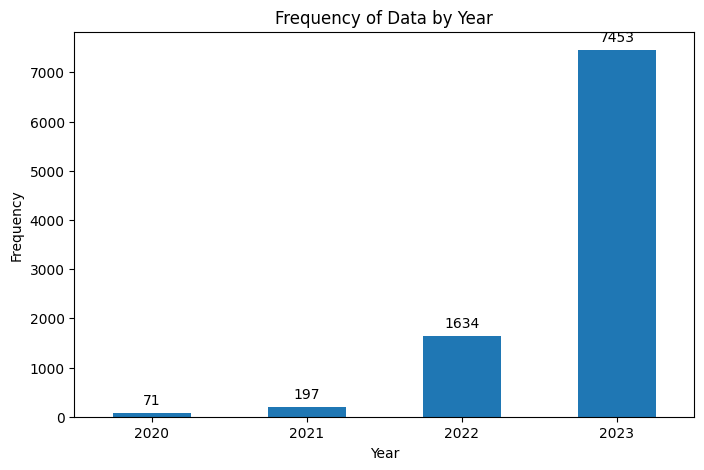

In [ ]:
# Visualization 1: Bar Chart for Year Frequency
plt.figure(figsize=(8, 5))
ax = year_frequency.sort_index().plot(kind='bar')
plt.title('Frequency of Data by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()





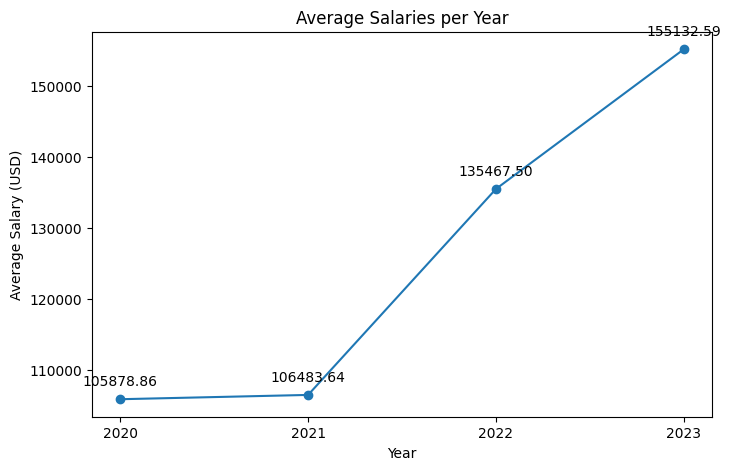

In [ ]:
# Visualization 2: Line Chart for Average Salaries per Year
plt.figure(figsize=(8, 5))
ax = average_salary_per_year.plot(kind='line', marker='o')
plt.title('Average Salaries per Year')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(average_salary_per_year.index)

for x, y in zip(average_salary_per_year.index, average_salary_per_year.values):
    ax.annotate(format(y, '.2f'),
                (x, y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

plt.show()



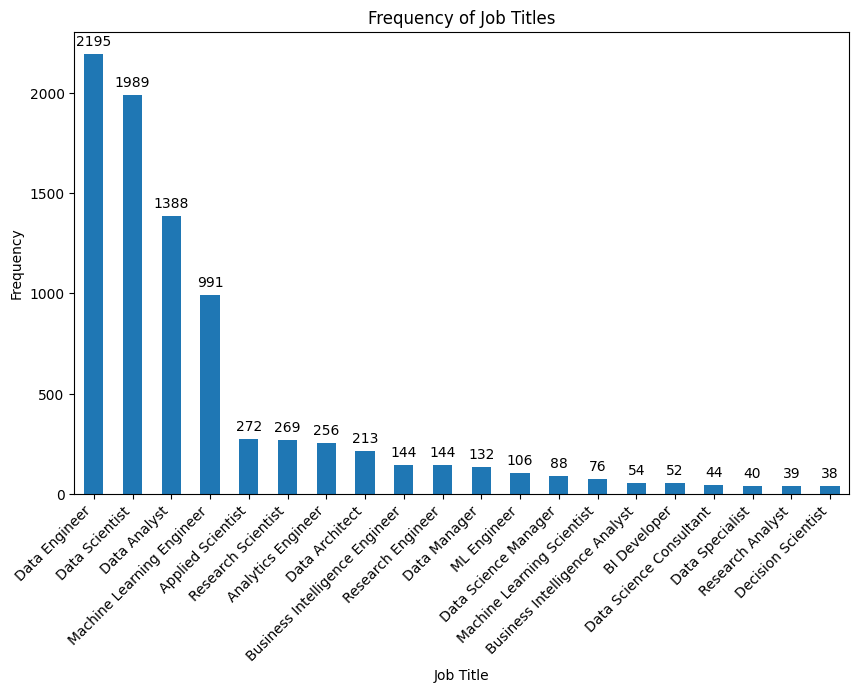

In [ ]:
# Visualization 3: Bar Chart for Frequency of Job Titles
plt.figure(figsize=(10, 6))
ax = job_title_frequency.head(20).plot(kind='bar')
plt.title('Frequency of Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()



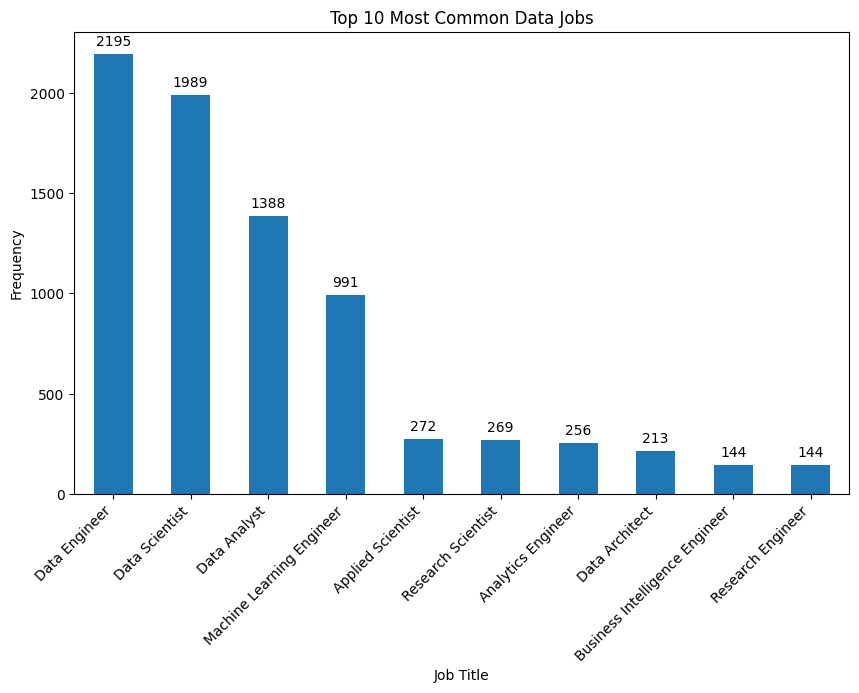

In [ ]:
# Visualization 4: Bar Chart for Top 10 Most Common Data Jobs
plt.figure(figsize=(10, 6))
ax = top_10_job_titles.plot(kind='bar')
plt.title('Top 10 Most Common Data Jobs')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.show()

<ipython-input-136-38ff966c1f74>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_top.set_xticklabels(ax_top.get_xticklabels(), rotation=45, ha='right')


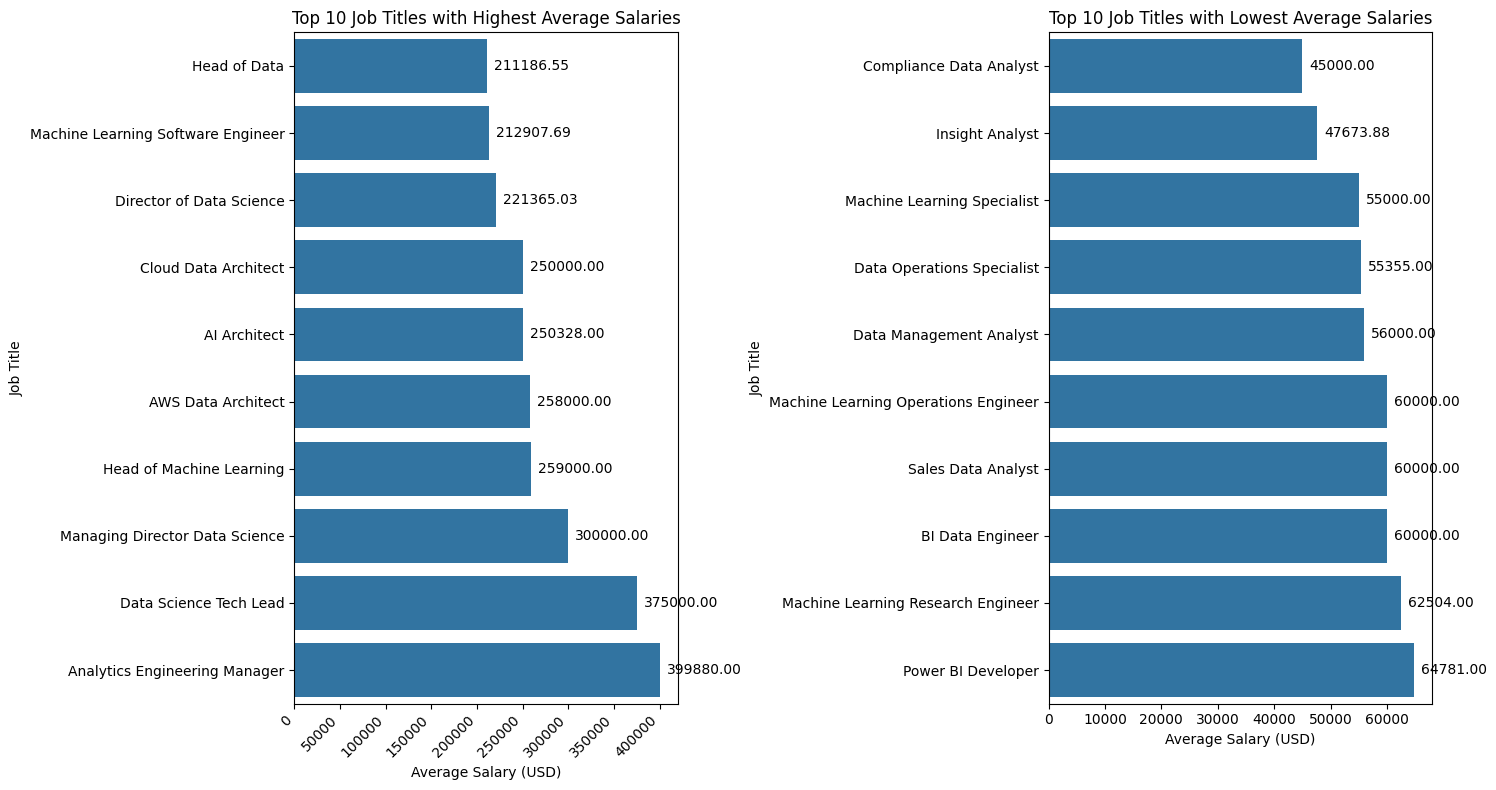

In [ ]:
# Visualization: Average Salaries by Job Titles (Top & Bottom)
average_salary_by_job_title = data_jobs_df.groupby('job_title')['salary_in_usd'].mean().sort_values()
top_job_titles = average_salary_by_job_title.tail(10)
bottom_job_titles = average_salary_by_job_title.head(10)

plt.figure(figsize=(15, 8))

# Plot for Top 10 Highest Average Salaries
plt.subplot(1, 2, 1)
ax_top = sns.barplot(x=top_job_titles.values, y=top_job_titles.index)
plt.title('Top 10 Job Titles with Highest Average Salaries')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')

for p in ax_top.patches:
    ax_top.annotate(format(p.get_width(), '.2f'),
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center',
                    xytext=(5, 0),
                    textcoords='offset points')
ax_top.set_xticklabels(ax_top.get_xticklabels(), rotation=45, ha='right')

# Plot for Top 10 Lowest Average Salaries
plt.subplot(1, 2, 2)
ax_bottom = sns.barplot(x=bottom_job_titles.values, y=bottom_job_titles.index)
plt.title('Top 10 Job Titles with Lowest Average Salaries')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')

for p in ax_bottom.patches:
    ax_bottom.annotate(format(p.get_width(), '.2f'),
                       (p.get_width(), p.get_y() + p.get_height() / 2),
                       ha='left', va='center',
                       xytext=(5, 0),
                       textcoords='offset points')

plt.tight_layout()
plt.show()


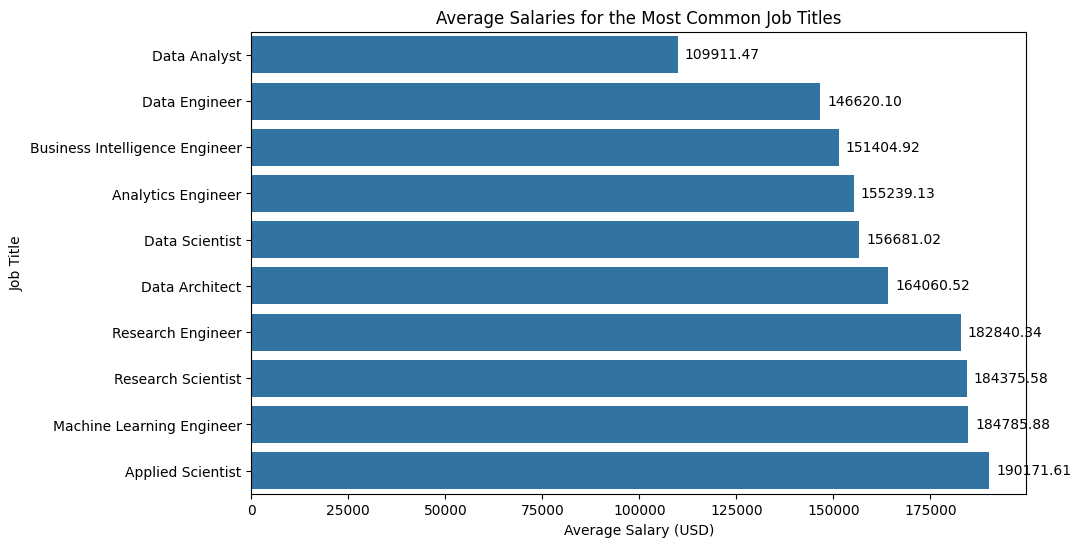

In [ ]:
# Visualization: Average Salaries for the Most Common Job Titles
average_salary_common_jobs = data_jobs_df[data_jobs_df['job_title'].isin(top_10_job_titles.index)].groupby('job_title')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_salary_common_jobs.values, y=average_salary_common_jobs.index)
plt.title('Average Salaries for the Most Common Job Titles')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')


plt.show()


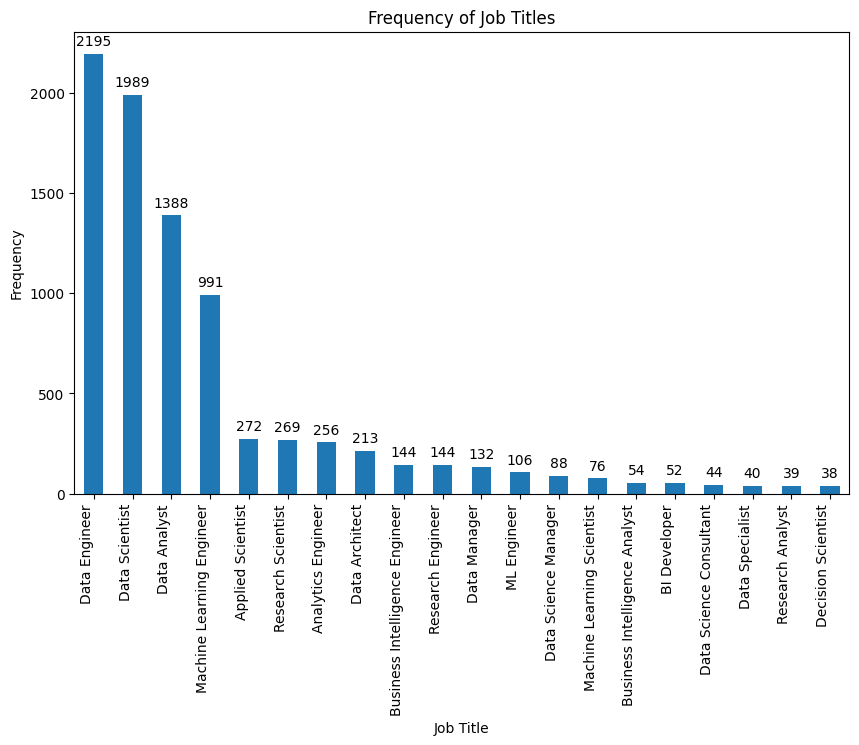

In [ ]:
# Visualization 3: Bar Chart for Frequency of Job Titles
plt.figure(figsize=(10, 6))
ax = job_title_frequency.head(20).plot(kind='bar')
plt.title('Frequency of Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()


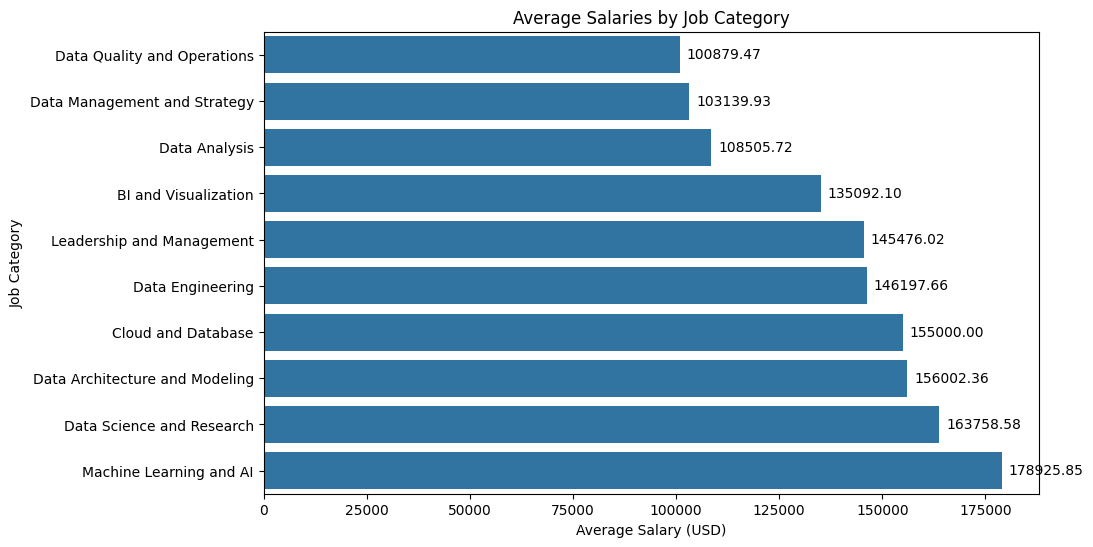

In [ ]:
# Visualization: Average Salaries by Job Category
average_salary_by_category = data_jobs_df.groupby('job_category')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_salary_by_category.values, y=average_salary_by_category.index)
plt.title('Average Salaries by Job Category')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Category')

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.show()


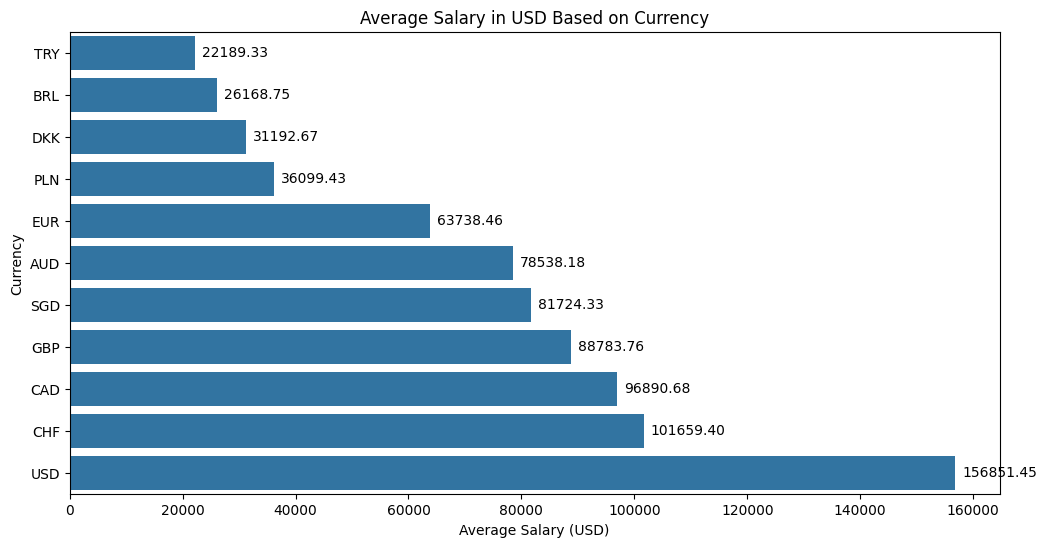

In [ ]:
# Visualization: Average Salary in USD Based on Currency
average_salary_by_currency = data_jobs_df.groupby('salary_currency')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(12, 6))
ax=sns.barplot(x=average_salary_by_currency.values, y=average_salary_by_currency.index)
plt.title('Average Salary in USD Based on Currency')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Currency')
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')
plt.show()

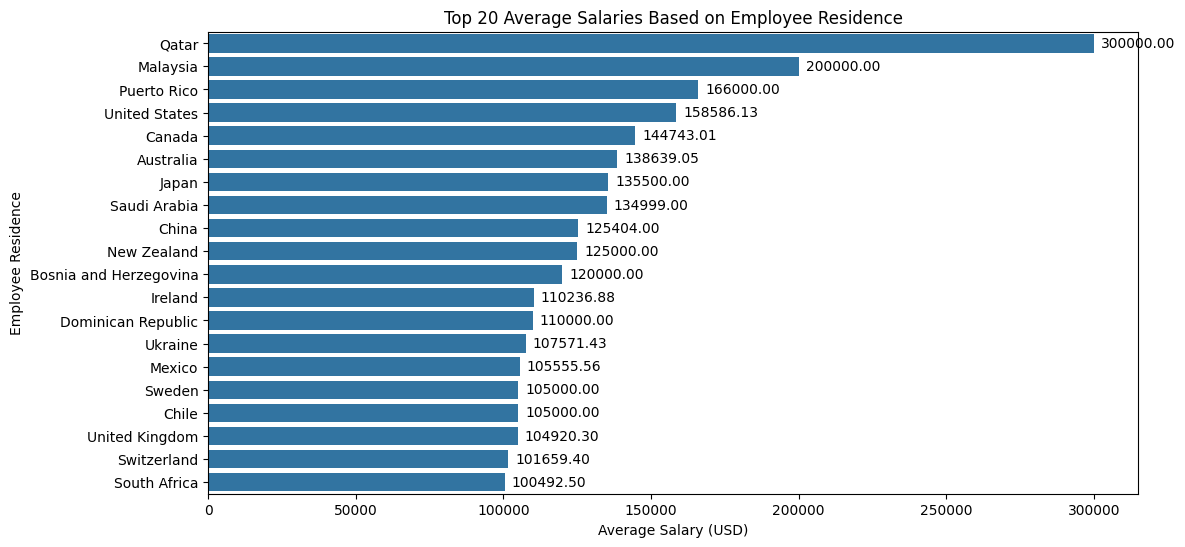

In [ ]:
# Visualization: Average Salary Based on Employee Residence
average_salary_by_employee_residence = data_jobs_df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
ax=sns.barplot(x=average_salary_by_employee_residence.values, y=average_salary_by_employee_residence.index)
plt.title('Top 20 Average Salaries Based on Employee Residence')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Employee Residence')
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')
plt.show()

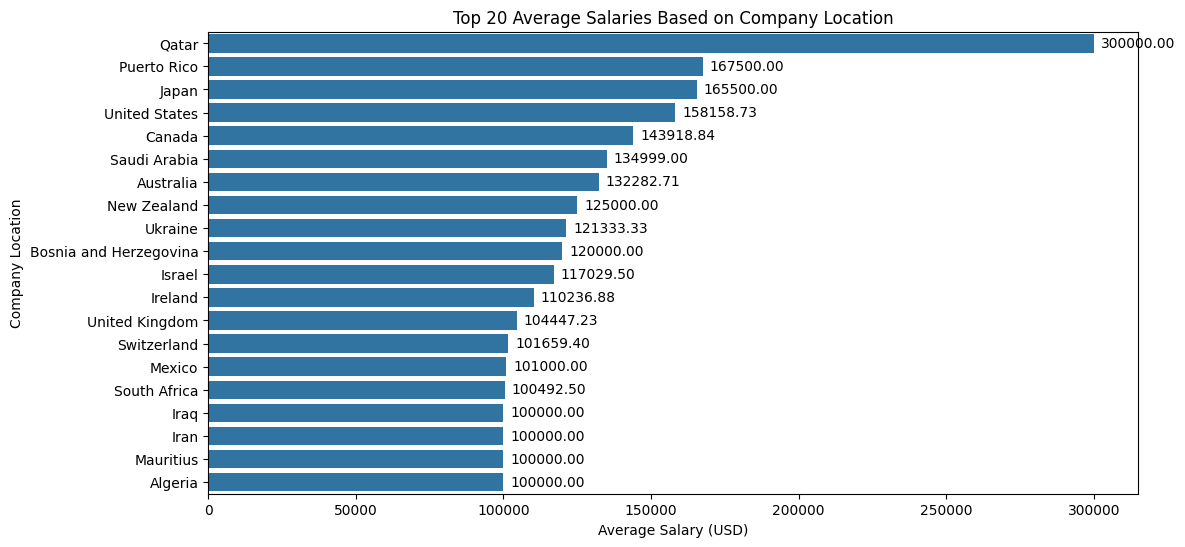

In [ ]:
# Visualization: Average Salary Based on Company Location
average_salary_by_company_location = data_jobs_df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
ax=sns.barplot(x=average_salary_by_company_location.values, y=average_salary_by_company_location.index)
plt.title('Top 20 Average Salaries Based on Company Location')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Company Location')
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')
plt.show()

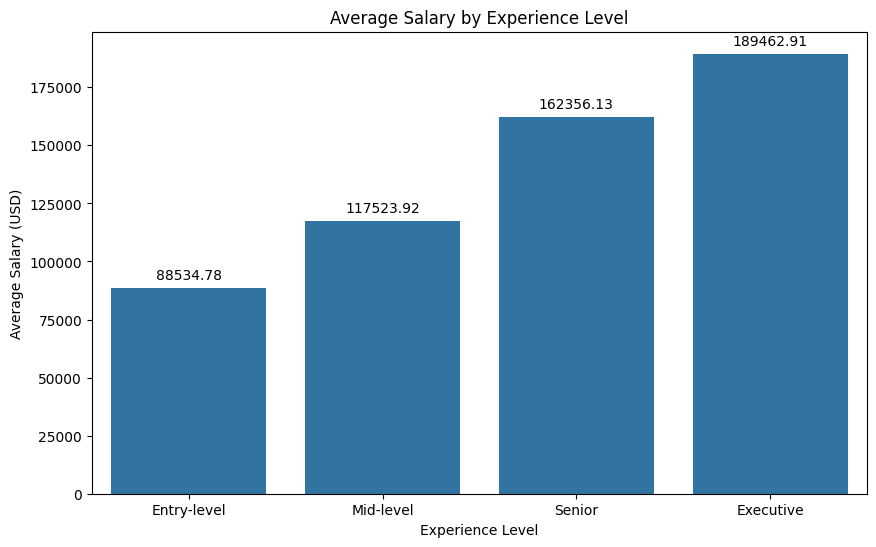

In [ ]:
# Visualization: Salary Based on Experience Level
average_salary_by_experience_level = data_jobs_df.groupby('experience_level')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_salary_by_experience_level.index, y=average_salary_by_experience_level.values)
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()


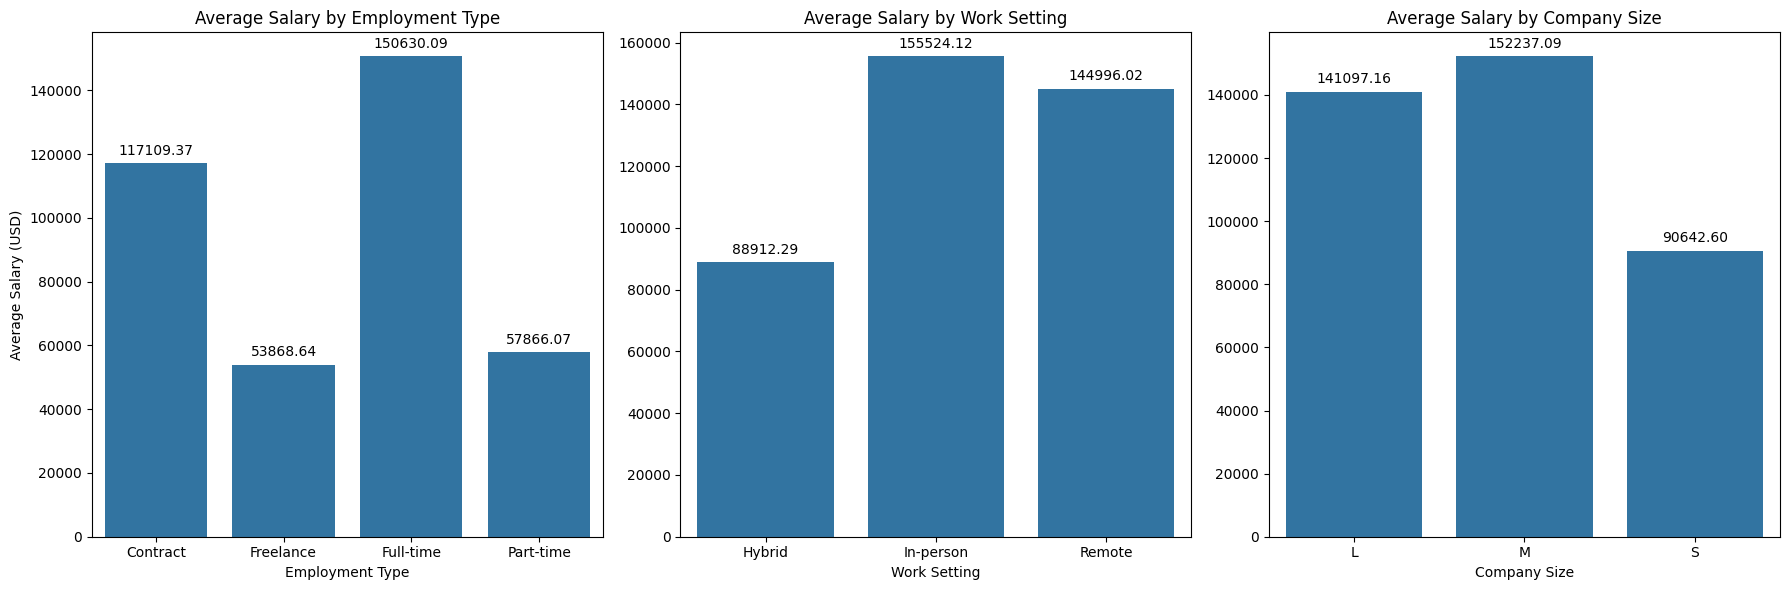

In [ ]:


# Visualization: Average Salary Based on Employment Type, Work Setting and Company Size
average_salary_by_employment_type = data_jobs_df.groupby('employment_type')['salary_in_usd'].mean()
average_salary_by_work_setting = data_jobs_df.groupby('work_setting')['salary_in_usd'].mean()
average_salary_by_company_size = data_jobs_df.groupby('company_size')['salary_in_usd'].mean()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
ax = sns.barplot(x=average_salary_by_employment_type.index, y=average_salary_by_employment_type.values)
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.subplot(1, 3, 2)
ax = sns.barplot(x=average_salary_by_work_setting.index, y=average_salary_by_work_setting.values)
plt.title('Average Salary by Work Setting')
plt.xlabel('Work Setting')
plt.ylabel('')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.subplot(1, 3, 3)
ax = sns.barplot(x=average_salary_by_company_size.index, y=average_salary_by_company_size.values)
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()



Salary Trends Over Time:
There has been a noticeable increase in average salaries from 2020 to 2023, indicating a rising trend in compensation in data-related fields.
Variability in Salaries by Job Title:

Significant variations in average salaries are evident across different job titles. High-demand roles like certain types of Data Scientists and Engineers tend to have higher average salaries, while more general or less specialized roles may have lower average compensation.
The disparity between the highest and lowest paying job titles suggests a broad range of specialization and value associated with different roles in the data field.
Popularity of Job Titles:

The most common job titles include Data Engineer, Data Scientist, and Data Analyst, reflecting the high demand and centrality of these roles in the data industry.
Impact of Job Category on Salaries:

Different job categories show distinct average salary levels, indicating that the nature of the specialization within the data field significantly influences remuneration.
Global Salary Comparison:

Salaries vary considerably based on the employee's location and the company's location. This variation could be influenced by factors like the local cost of living, economic conditions, and the demand for data skills in different regions.
Experience Level and Compensation:

Experience level has a clear impact on salaries. Higher experience levels, such as 'Senior' and 'Executive', are associated with higher average salaries, which is consistent with the general expectation of higher pay for more experienced professionals.
Influence of Employment Type, Work Setting, and Company Size:

Different employment types (Full-time, Part-time, Contract) show variations in average salaries, reflecting the differing nature of employment agreements.
The work setting (Remote, In-person, Hybrid) also influences salaries, although the exact nature of this influence might be nuanced and dependent on the specific job and industry context.
Company size shows a correlation with average salary, suggesting that larger companies may offer higher compensation, possibly due to greater resources and scalability.

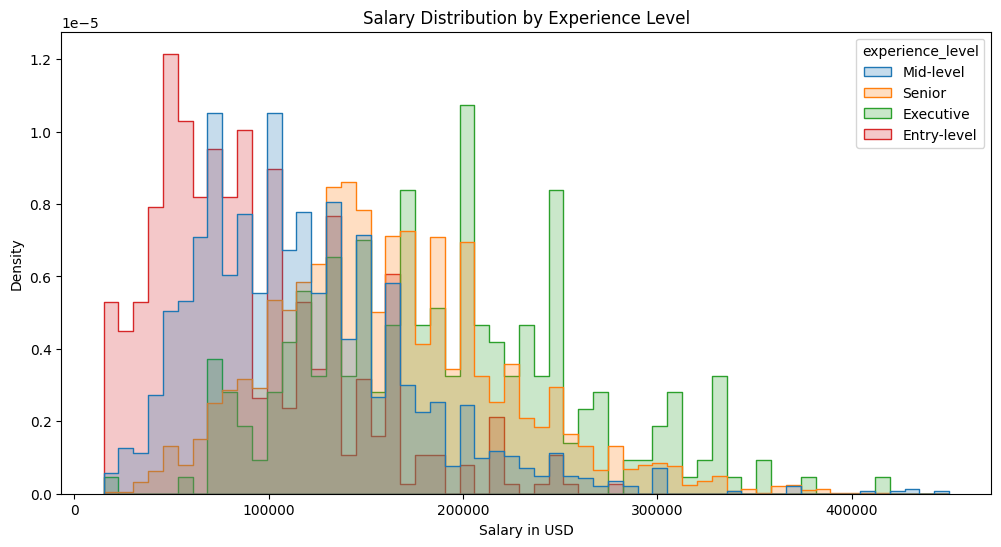

In [ ]:
# Salary Distribution Histograms for various job titles and experience levels
plt.figure(figsize=(12, 6))
sns.histplot(data_jobs_df, x='salary_in_usd', hue='experience_level', element='step', stat='density', common_norm=False)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Salary in USD')
plt.ylabel('Density')
plt.show()




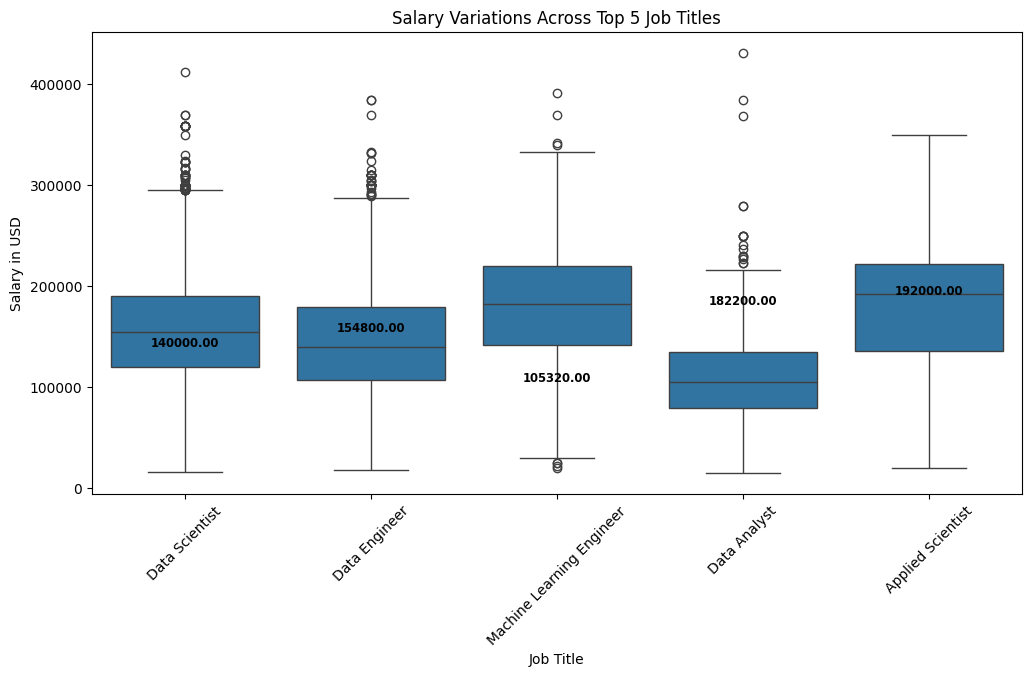

In [ ]:
# Box Plots for Salary Variations across different job titles
top_5_job_titles = top_10_job_titles.head(5).index
data_top_job_titles = data_jobs_df[data_jobs_df['job_title'].isin(top_5_job_titles)]

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='job_title', y='salary_in_usd', data=data_top_job_titles)
plt.title('Salary Variations Across Top 5 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)

for i in range(len(top_5_job_titles)):
    median_val = data_top_job_titles[data_top_job_titles['job_title'] == top_5_job_titles[i]]['salary_in_usd'].median()
    ax.text(i, median_val, f'{median_val:.2f}',
            horizontalalignment='center', size='small', color='black', weight='semibold')

plt.show()


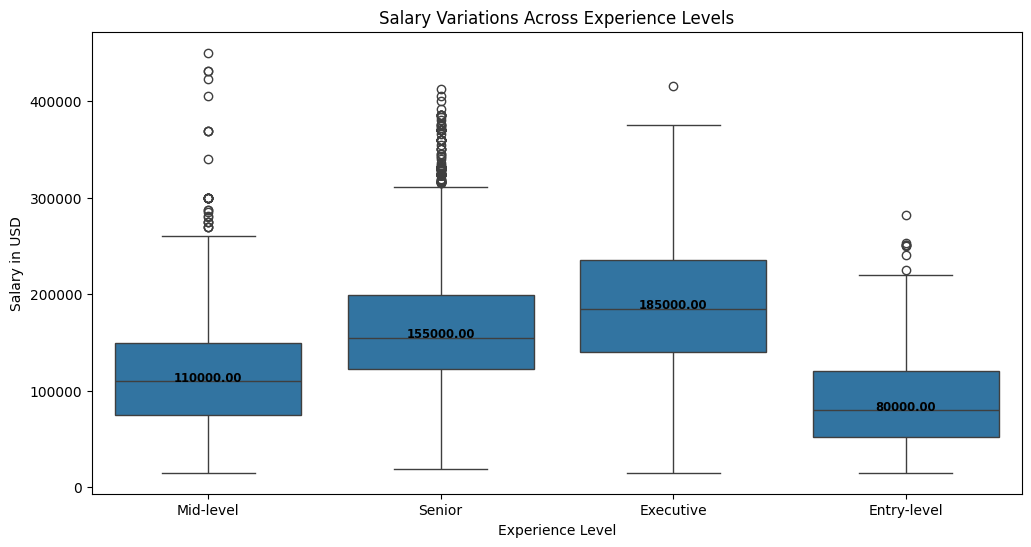

In [ ]:
# Box Plots for Salary Variations across experience levels
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='experience_level', y='salary_in_usd', data=data_jobs_df)
plt.title('Salary Variations Across Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')


experience_levels = data_jobs_df['experience_level'].unique()
for i, level in enumerate(experience_levels):
    median_val = data_jobs_df[data_jobs_df['experience_level'] == level]['salary_in_usd'].median()
    ax.text(i, median_val, f'{median_val:.2f}',
            horizontalalignment='center', size='small', color='black', weight='semibold')

plt.show()


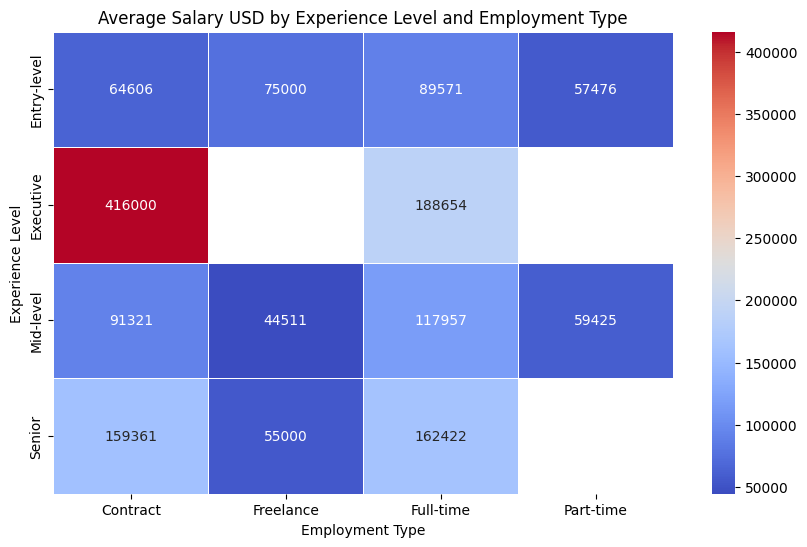

In [ ]:
pivot_table = data_jobs_df.pivot_table(values='salary_in_usd',
                                       index='experience_level',
                                       columns='employment_type',
                                       aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Average Salary USD by Experience Level and Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Experience Level')
plt.show()



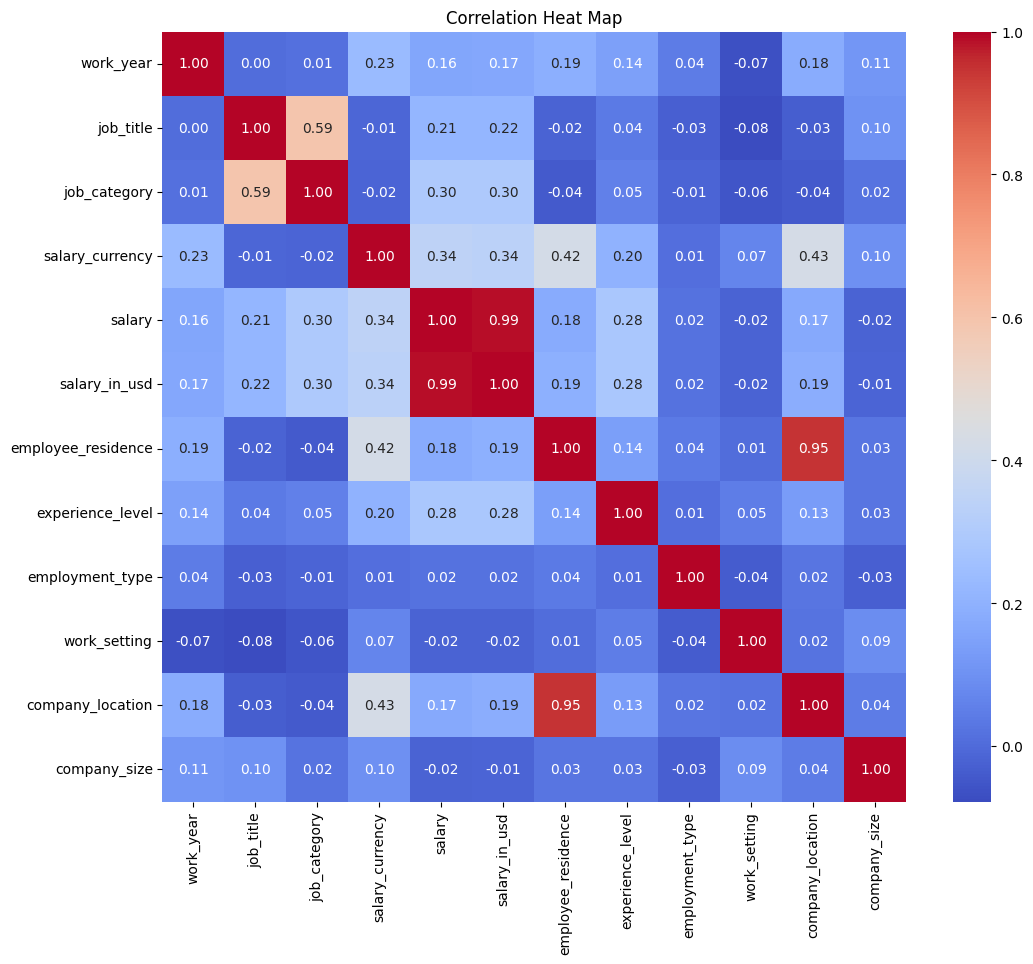

In [ ]:

# Correlation Heat Map between different numerical variables
from sklearn.preprocessing import LabelEncoder
correlation_data = data_jobs_df.copy()
label_encoder = LabelEncoder()
categorical_columns = correlation_data.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    correlation_data[column] = label_encoder.fit_transform(correlation_data[column])

correlation_matrix = correlation_data.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heat Map')
plt.show()


Salary Distribution by Experience Level:

This histogram shows how salary distributions vary across different experience levels. It provides insights into the density and spread of salaries for each experience category.
Salary Variations Across Top 5 Job Titles:

The box plot for the top 5 job titles reveals the range, median, quartiles, and outliers in salaries for these roles. This helps in understanding the salary variability within these common roles.
Salary Variations Across Experience Levels:

This box plot compares salary variations across different experience levels, illustrating the range and distribution of salaries in each category.
Correlation Heat Map:

The heat map displays correlations between various numerical variables in the dataset, including encoded categorical variables. Higher positive values indicate a stronger positive correlation, and vice versa for negative values.

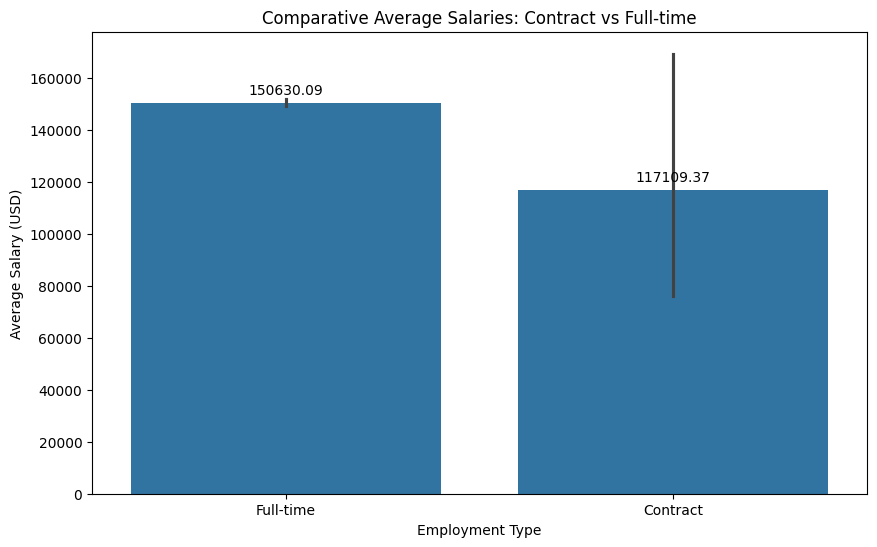

In [ ]:
# Comparative Bar Graphs for Contract vs Full-time Salaries
contract_full_time_data = data_jobs_df[data_jobs_df['employment_type'].isin(['Contract', 'Full-time'])]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='employment_type', y='salary_in_usd', data=contract_full_time_data)
plt.title('Comparative Average Salaries: Contract vs Full-time')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()




Comparative Average Salaries: Contract vs Full-time:
This bar graph provides a direct comparison of the average salaries for Contract and Full-time positions. It helps in understanding how employment type influences the average salary in the data job market.